In [148]:
'''
Importing necessary libraries for model building and evaluation.

'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from keras.activations import tanh,relu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer , Input
from tensorflow.keras.optimizers import Adam , SGD


Data Generation: Generate Spiral Dataset as given in document.

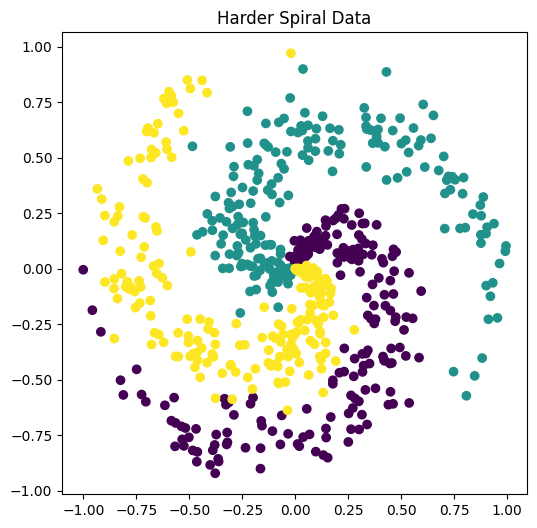

In [150]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4,
num_classes=3):
  N = 200 # points per class
  D = 2 # input dimension
  K = 3 # number of classes
  X = np.zeros((N*K,D))
  y = np.zeros(N*K, dtype='uint8')
  noise = 0.4
  for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)* noise
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  return X, y
# Generate data
X, y = generate_harder_spiral_data()
# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.title('Harder Spiral Data')
plt.show()

Data Preprocessing :

In [4]:
'''scale data set '''
x_scaled = StandardScaler().fit_transform(X)


'''split the data into train and test '''                                # Total =600
X_train, X_test, y_train, y_test = train_test_split(                    #Training Split = 80% = 480 , Test Split = 20% = 120
    x_scaled, y, test_size=0.2, stratify=y, random_state=42
)

Model Building :

In [141]:
#  model: input (x1,x2) → output (Classification)

input_size = X_train.shape[1]   #Input Shape = 2
model_spiral_ = Sequential()
model_spiral_.add(Input(shape=(input_size,))) #Input layer
model_spiral_.add(Dense(26, activation=relu, name="first_dense"))     #Activation = Relu
model_spiral_.add(Dense(13, activation=relu , name= "second_dense"))
model_spiral_.add(Dense(7, activation=relu , name= "third_dense"))
model_spiral_.add(Dense(3, activation='softmax' , name = "classification_layer")) #Classification decision boundry learning layer

model_spiral_.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_dense (Dense)             │ (None, 26)             │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 13)             │           351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 7)              │            98 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_layer (Dense)    │ (None, 3)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
model_spiral_.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy']) # becasuse data has 3 classes , used crossentropy loss.

Model Training

In [143]:
# Define early_stopping_monitor
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)


history = model_spiral_.fit(X_train, y_train, epochs=100
          , batch_size=32, validation_split=0.2 ,  callbacks= [early_stopping_monitor])     #After checking many batch sizes choose : 32 , epochs decided after Layers and neuron.

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3427 - loss: 1.0933 - val_accuracy: 0.3333 - val_loss: 1.0674
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2917 - loss: 1.0611 - val_accuracy: 0.3438 - val_loss: 1.0390
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3688 - loss: 1.0330 - val_accuracy: 0.3646 - val_loss: 1.0210
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3832 - loss: 1.0188 - val_accuracy: 0.3854 - val_loss: 1.0049
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3893 - loss: 0.9982 - val_accuracy: 0.3854 - val_loss: 0.9904
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3855 - loss: 0.9792 - val_accuracy: 0.4167 - val_loss: 0.9758
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4455 - loss: 0.9551 - val_accuracy: 0.4167 - val_loss: 0.9624
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4500 - loss: 0.9504 - val_accuracy: 0.

Decision Boundary Plot:

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


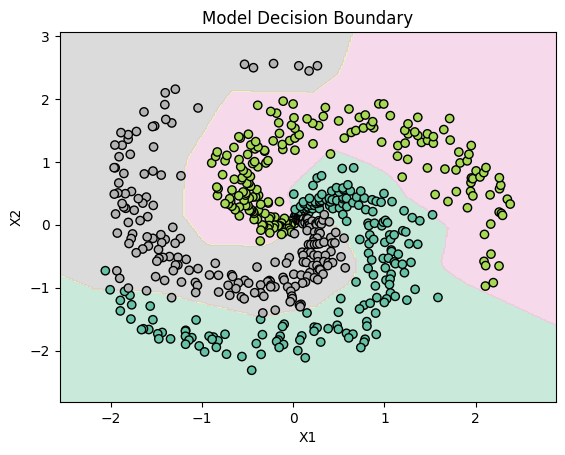

In [144]:
# Visualising Decision Boundary :

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Get predicted probabilities for each class
    probs = model.predict(grid)

    # Get the class with the highest probability
    predicted_classes = np.argmax(probs, axis=1)

    # Reshape the predicted classes to match the grid shape
    predicted_classes = predicted_classes.reshape(xx.shape)

    plt.contourf(xx, yy, predicted_classes, cmap='Pastel2', alpha=0.7) # Removed levels
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set2')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(model_spiral_4, x_scaled, y, "Model Decision Boundary")


Model Evaluation:

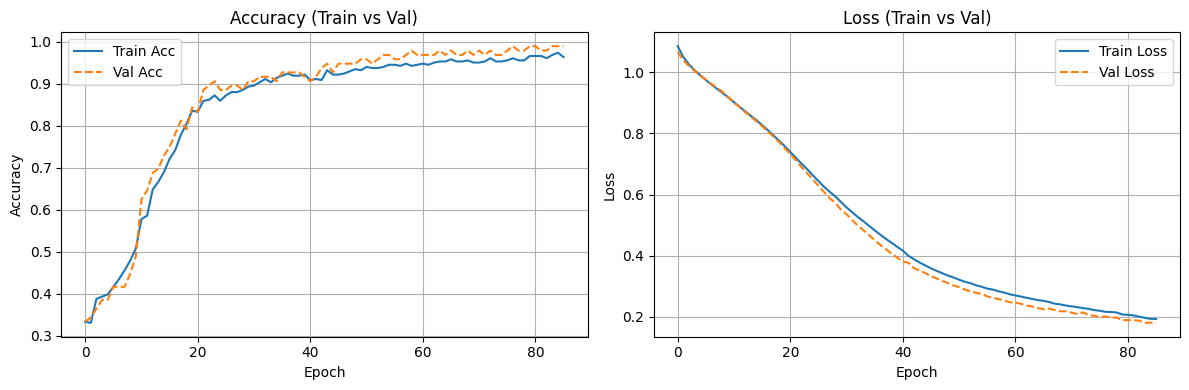

In [145]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
axs[0].plot(history.history['accuracy'], label='Train Acc')
axs[0].plot(history.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title("Accuracy (Train vs Val)")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid(True)

# Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title("Loss (Train vs Val)")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Accuracy Measure

In [153]:
loss1, acc1 = model_spiral_4.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9892 - loss: 0.1226
Test accuracy : 98.33%
Test loss     : 12.10%


In [ ]:
'''
1. How did you decide the number of hidden layers and neurons?

Ans: Empirical analysis through selecting different layers and number of neurons for each layer and trainig and comparing learnig and accuracy.
Analysis:
  The more the number of neurons at first layer the faster the Learning with given hyperparameters. As if we increase model complexity the accuracy increases and faster it learns.
  The less the number of layers/neurons the slower the model learns.

2. How did different learning rates affect the results?

Ans: Learning rate affects the model learing and convergence through optimization , as bigger and smaller learning rates does not help find global optima or with any faster convergence.

3. Did you encounter overfitting or underfitting? How did you deal with it?

Ans: Yes i did encounter Underfitting when i trained model with less complex layers and neurons. so i increased the number of layers and neurons for each layer.
      Overfitting becasue model i build was complex enough to remmeber the data becasue the accuracy was going up faster so i applied early stopping to stop the model from overfitting.

4. If you had more time, how would you further improve the model?

Ans:  i would have evaluaetd the model with more hyper parameters like diff learning rates , different optimizers and different activation functions compared the result to find the optimal accuracy.
        Tuning Hyperparameters.
'''